Detail dari dataset hari ini bisa dibaca di:  
https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists?select=aug_train.csv  

Buatlah EDA mengenai demografis calon karyawan dan hubungannya dengan kemungkinan mereka bekerja di perusahaan yg menyediakan training!  

Setelah selasai, upload hasil analisis kalian ke Github kalian masing-masing dan kirimkan link github kalian ke brigita.gems@gmail.com untuk feedback.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df=pd.read_csv('hr-analytic.csv')
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

Features:
- enrollee_id : Unique ID for candidate

- city: City code

- city_ development _index : Developement index of the city (scaled)

- gender: Gender of candidate

- relevent_experience: Relevant experience of candidate

- enrolled_university: Type of University course enrolled if any

- education_level: Education level of candidate

- major_discipline :Education major discipline of candidate

- experience: Candidate total experience in years

- company_size: No of employees in current employer's company

- company_type : Type of current employer

- lastnewjob: Difference in years between previous job and current job

- training_hours: training hours completed

- target: 0 – Not looking for job change, 1 – Looking for a job change

In [17]:
df.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [18]:
df['target'].value_counts()

0.0    14381
1.0     4777
Name: target, dtype: int64

In [19]:
df.dropna(subset=['enrolled_university','education_level','experience','last_new_job'], axis=0, inplace=True)

In [20]:
col_mode = ['gender','company_size','major_discipline','company_type','relevent_experience']
for col in col_mode:
    df[col].fillna(df[col].mode()[0],inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18014 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             18014 non-null  int64  
 1   city                    18014 non-null  object 
 2   city_development_index  18014 non-null  float64
 3   gender                  18014 non-null  object 
 4   relevent_experience     18014 non-null  object 
 5   enrolled_university     18014 non-null  object 
 6   education_level         18014 non-null  object 
 7   major_discipline        18014 non-null  object 
 8   experience              18014 non-null  object 
 9   company_size            18014 non-null  object 
 10  company_type            18014 non-null  object 
 11  last_new_job            18014 non-null  object 
 12  training_hours          18014 non-null  int64  
 13  target                  18014 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

#### Gender

<AxesSubplot:xlabel='gender', ylabel='count'>

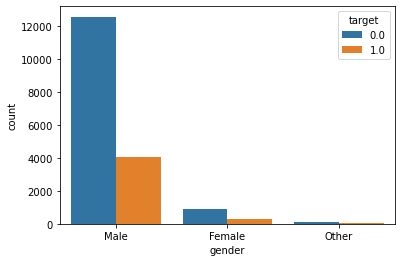

In [52]:
sns.countplot(df['gender'], hue =df['target'])

Text(0.5, 1.0, 'Persentase Gender yang Mencari Pekerjaan Baru')

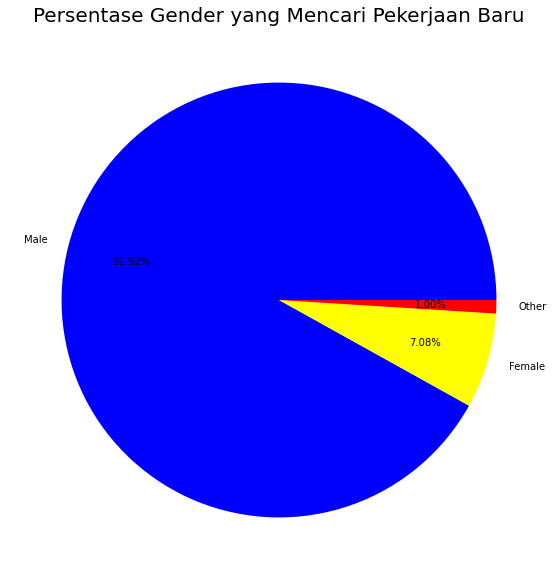

In [29]:
plt.figure(figsize=(10,10))
gender = df[df['target'] == 1]['gender']
temp = gender.value_counts()
labels = temp.keys()
plt.pie(x = temp, labels = labels , colors = ['blue','yellow','red'], autopct="%.2f%%",pctdistance=0.7)
plt.title('Persentase Gender yang Mencari Pekerjaan Baru', fontsize=20)

Kemungkinan pria untuk keluar jauh lebih tinggi dibanding wanita. Akan tetapi hal ini bisa dikarenakan diskrepansi data gender itu sendiri.

In [30]:
df['gender'].value_counts()

Male      16635
Female     1206
Other       173
Name: gender, dtype: int64

In [31]:
gender = df[df['target'] == 1]['gender']
gender.value_counts()

Male      4064
Female     313
Other       44
Name: gender, dtype: int64

In [54]:
gender.value_counts()/df['gender'].value_counts()*100

Male      24.430418
Female    25.953566
Other     25.433526
Name: gender, dtype: float64

Hasil di atas menunjukkan sebanyak 24-25% dari tiap gender akan keluar. Oleh karena itu, gender bukan faktor utama dalam penentuan seseorang akan keluar atau tidak.

#### City Development Index

<AxesSubplot:xlabel='target', ylabel='city_development_index'>

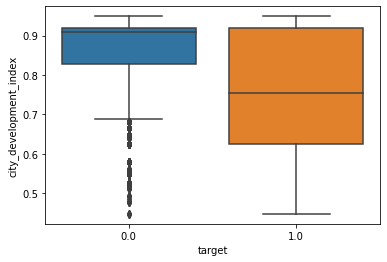

In [41]:
sns.boxplot(data=df,x='target',y='city_development_index')

 - Kebanyakan kandidat yang stay berasal dari kota dengan development index di range 0.8 - 0.9, sedangkan kandidat yang keluar berasal dari kota dengan development index 0.6 - 0.9
 - Kemungkinan kandidat yang diprediksi akan keluar berasal dari kota dengan development index di bawah 0.8 karena ingin mencari kenyamanan bekerja di kota dengan development index tinggi

#### Relevant Experience

/Users/marshaalexandra/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Pengalaman Kerja berdasarkan Target')

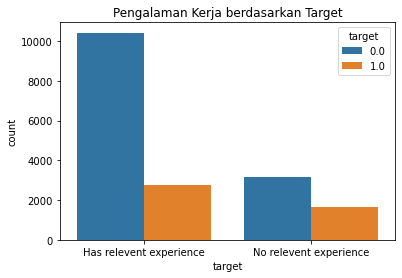

In [48]:
sns.countplot(df['relevent_experience'],hue=df['target'])
plt.xlabel('target')
plt.ylabel('count')
plt.title('Pengalaman Kerja berdasarkan Target')

In [49]:
exp_target = df[df['target'] == 1]['relevent_experience']

exp_target.value_counts()/df['relevent_experience'].value_counts()*100

Has relevent experience    21.015921
No relevent experience     34.183250
Name: relevent_experience, dtype: float64

Dari data di atas, kandidat yang tidak punya relevant experience punya kecenderungan lebih besar untuk keluar dibanding kandidat yang punya relevant experience. Hal ini kemungkinan dikarenakan kandidat yang tidak punya relevant experience dapat pengalaman baru selama training yang membuat mereka tertarik untuk keluar dan bekerja di perusahaan tempat mereka training.

#### Education Level

/Users/marshaalexandra/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Level Pendidikan berdasarkan Target')

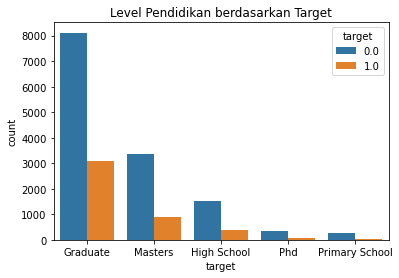

In [63]:
sns.countplot(df['education_level'], hue=df['target'])
plt.xlabel('target')
plt.ylabel('count')
plt.title('Level Pendidikan berdasarkan Target')

In [62]:
edu_target = df[df['target'] == 1]['education_level']

edu_target.value_counts()/df['education_level'].value_counts()*100

Graduate          27.466929
Masters           20.908231
High School       19.496855
Phd               13.784461
Primary School    12.714777
Name: education_level, dtype: float64

Kecenderungan kandidat keluar paling besar ada di kandidat yang sudah menyelesaikan S1 dan S2. Ada kecenderungan tingkat pendidikan yang tinggi membuat kandidat lebih mudah keluar karena dengan tingkat pendidikan yang tinggi, kandidat punya kapabilitas untuk mencari pekerjaan/perusahaan dibandingkan kandidat dengan tingkat pendidikan rendah.

#### Major Discipline

/Users/marshaalexandra/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Jurusan Utama berdasarkan Target')

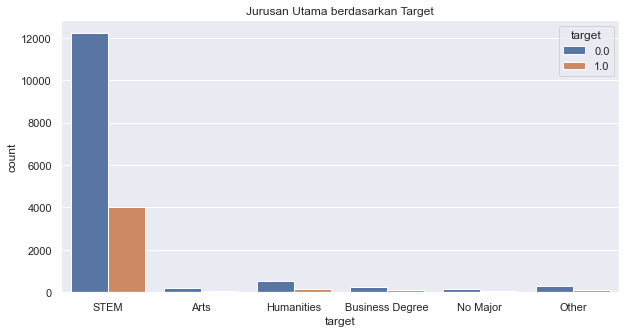

In [75]:
plt.figure(figsize =(10,5))
sns.countplot(df['major_discipline'],hue=df['target'])
plt.xlabel('target')
plt.ylabel('count')
plt.title('Jurusan Utama berdasarkan Target')

In [67]:
disc_target = df[df['target'] == 1]['major_discipline']

disc_target.value_counts()/df['major_discipline'].value_counts()*100

STEM               24.711687
Humanities         20.520674
Other              25.274725
Business Degree    26.086957
Arts               20.967742
No Major           24.528302
Name: major_discipline, dtype: float64

Kandidat dari Business dan STEM memiliki kecenderungan keluar ke Data Science company paling besar. Hal ini menarik karena STEM merupakan jurusan yang sejalan dengan Data Science, sedangkan Business merupakan jurusan yang sangat berbeda dengan Data Science. Kandidat dengan kecenderungan saty paling besar berasal dari jurusan Arts dan Humanities.

#### Experience

/Users/marshaalexandra/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='experience', ylabel='count'>

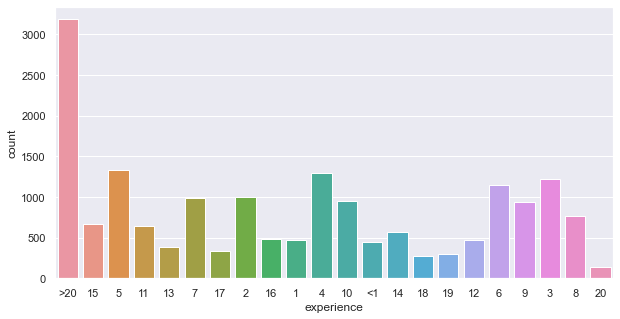

In [76]:
plt.figure(figsize =(10,5))
sns.countplot(df['experience'])

In [84]:
year_target = df[df['target'] == 1]['experience']

year = year_target.value_counts()/df['experience'].value_counts()*100
year.sort_values(ascending = False)

<1     45.676275
1      42.105263
3      34.914146
2      33.701103
4      32.126348
7      29.531568
5      29.094989
6      28.608924
8      23.958333
20     23.239437
11     22.804314
10     21.353066
9      21.153846
13     18.863049
12     17.894737
14     17.750439
17     16.918429
15     16.616766
19     16.326531
>20    15.273413
18     14.285714
16     13.319672
Name: experience, dtype: float64

Kandidat dengan pengalaman kerja di bawah 5 tahun punya kecenderungan keluar paling besar. Hal ini masuk akal karena semakin lama kandidat beradaptasi pada perusahaan, kemungkinan kandidat keluar lebih kecil.

#### Company Type

/Users/marshaalexandra/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


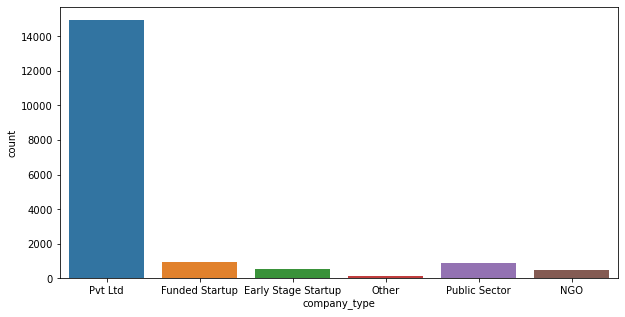

In [35]:
plt.figure(figsize=(10,5))
sns.countplot(df['company_type'])
plt.show()

Text(0.5, 1.0, 'Persentase Kandidat yang Keluar')

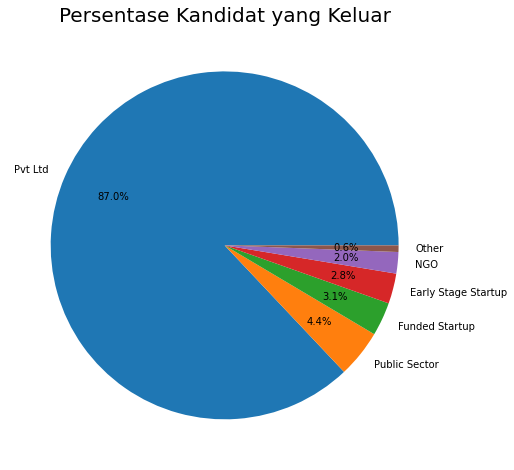

In [43]:
company_type = df[df['target'] == 1]['company_type']
temp = company_type.value_counts()
labels = temp.keys()
bar,ax = plt.subplots(figsize=(8,8))
plt.pie(x = temp, labels = labels, autopct="%.1f%%",pctdistance=0.7)
plt.title('Persentase Kandidat yang Keluar', fontsize=20)

In [46]:
for i in df['company_type'].unique():
    company_newjob = df[(df['company_type']==i) & df['target']==1]
    print('{} % kandidat dari {} mencari pekerjaan baru'.format(len(company_newjob)/len(df['company_type']==i)*100,i))

21.361163539469302 % kandidat dari Pvt Ltd mencari pekerjaan baru
0.7660708337959365 % kandidat dari Funded Startup mencari pekerjaan baru
0.6883535028311313 % kandidat dari Early Stage Startup mencari pekerjaan baru
0.1498834240035528 % kandidat dari Other mencari pekerjaan baru
1.0880426335072721 % kandidat dari Public Sector mencari pekerjaan baru
0.48850893749306096 % kandidat dari NGO mencari pekerjaan baru


Dari data di atas, dapat dilihat bahwa kebanyakan kandidat yang keluar dari Pvt Ltd.

#### Company Size

In [88]:
df.replace('10/49', '10-49',inplace = True)

/Users/marshaalexandra/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


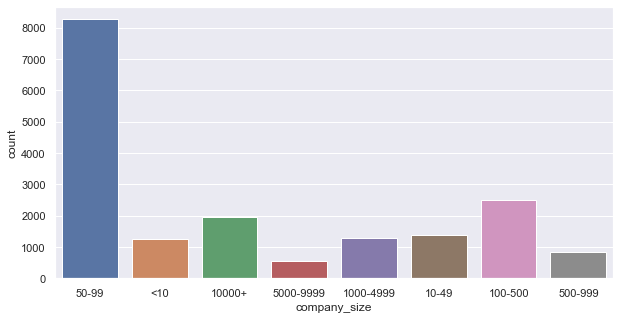

In [91]:
plt.figure(figsize=(10,5))
sns.countplot(df['company_size'])
plt.show()

In [92]:
size_target = df[df['target'] == 1]['company_size']

size =size_target.value_counts()/df['company_size'].value_counts()*100
size.sort_values(ascending = False)

50-99        32.966102
10-49        22.238164
10000+       18.737271
5000-9999    17.896679
500-999      17.001181
<10          16.425121
100-500      15.626259
1000-4999    14.586583
Name: company_size, dtype: float64

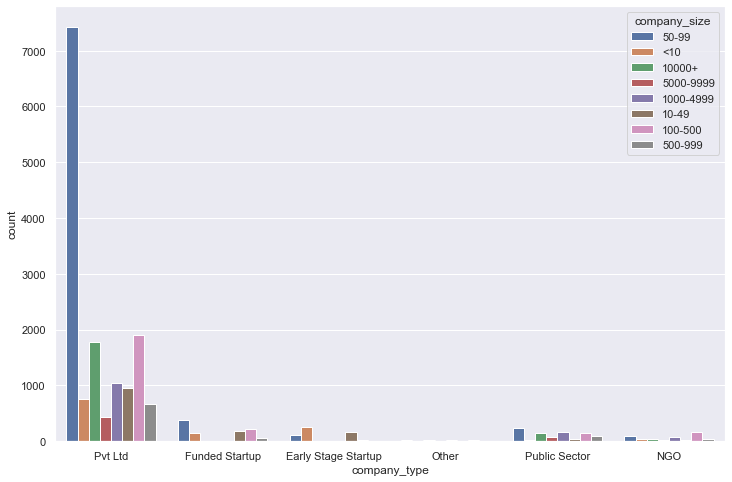

In [94]:
sns.set(style="darkgrid")
plt.figure(figsize=(12,8))
sns.countplot(x='company_type', hue='company_size', data=df)
plt.show()

Dari data di atas, kandidat dari perusahaan dengan jumlah karyawan 50-99 punya kecenderungan keluar paling besar. Hal ini kemungkinan dikarenakan kebanyakan perusahaan dengan jumlah karyawan tersebut merupakan private companies (Pvt Ltd). Dari data company type diperoleh insights bahwa kandidat yang keluar paling banyak berasal dari private companies.

#### Last_new_job

/Users/marshaalexandra/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


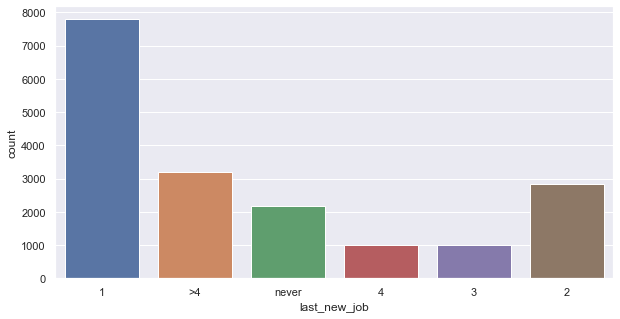

In [95]:
plt.figure(figsize=(10,5))
sns.countplot(df['last_new_job'])
plt.show()

In [96]:
gap_target = df[df['target'] == 1]['last_new_job']

gap =gap_target.value_counts()/df['last_new_job'].value_counts()*100
gap.sort_values(ascending = False)

never    31.229995
1        26.165105
2        24.018394
3        22.502523
4        21.782178
>4       18.006231
Name: last_new_job, dtype: float64

Dari data di atas, semakin besar gap antara pekerjaan lama dan pekerjaan baru, semakin kecil kemungkinan kandidat untuk keluar. Hal ini masuk akal karena bila gapnya besar, kemungkinan kandidat tersebut kesulitan mencari pekerjaan dan akan bertahan lebih lama di pekerjaan yang baru didapati.

#### Training hours

/Users/marshaalexandra/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/marshaalexandra/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


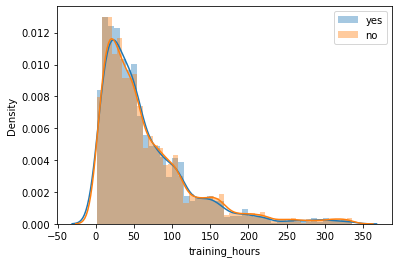

In [36]:
sns.distplot(df[df['target']==1.0]['training_hours'],label='yes')
sns.distplot(df[df['target']==0.0]['training_hours'],label='no')
plt.legend()

Training hours antara kandidat yang ingin stay dan kandidat yang ingin keluar hampir overlap, artinya tidak ada perbedaan signifikan dalam training hours sehingga training hours juga bukan faktor penentu dalam hal ini.

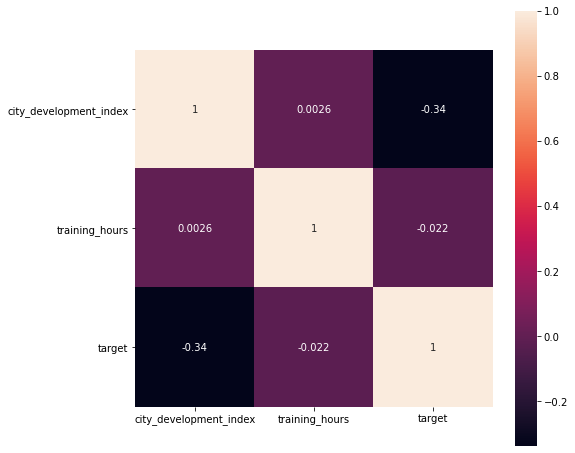

In [71]:
#numerical feature correlation
plt.figure(figsize=(8,8))
sns.heatmap(df.drop(columns=['enrollee_id']).corr(), annot=True, square=True)
plt.show()

Berdasarkan heatmap diatas, feature numerical di atas memiliki korelasi yang rendah dengan target. Akan tetapi hasil boxplot city_development_index menunjukkan korelasi dengan kelas target.

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18014 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             18014 non-null  int64  
 1   city                    18014 non-null  object 
 2   city_development_index  18014 non-null  float64
 3   gender                  18014 non-null  object 
 4   relevent_experience     18014 non-null  object 
 5   enrolled_university     18014 non-null  object 
 6   education_level         18014 non-null  object 
 7   major_discipline        18014 non-null  object 
 8   experience              18014 non-null  object 
 9   company_size            18014 non-null  object 
 10  company_type            18014 non-null  object 
 11  last_new_job            18014 non-null  object 
 12  training_hours          18014 non-null  int64  
 13  target                  18014 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [ ]:
 Untuk penentuan kandidat keluar/stay dapat diperoleh dari feature-feature:
    - city development index
    - relevant experience
    - education level
    - major discipline
    - (work) experience
    - company size / company type
    - last new job
    
Demografis kandidat karyawan yang kemungkinan akan bekerja di perusahaan tersebut (keluar) adalah:
    - kandidat yang berasal dari kota dengan city development index di bawah 0.8
    - kandidat yang tidak memiliki pengalaman kerja yang relevan dengan training
    - kandidat dengan education level S1 dan S2
    - kandidat dengan major discipline selain Arts dan Humanities
    - kandidat dengan work experience di bawah 5 tahun
    - kandidat yang berasal dari private companies, dengan jumlah karyawan 50-99
    - kandidat yang gap antar pekerjaan